In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

import seaborn as sns

%matplotlib inline

In [4]:
data_file =pd.read_csv("winequality-white.csv",delimiter=';')

In [84]:
data_file

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [201]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [202]:
#check for missing data
data_file.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data_file.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
#amount of wine with above average quality
data_file.loc[data_file['quality'] > 6 ].groupby('quality')['quality'].count()

quality
7    880
8    175
9      5
Name: quality, dtype: int64

In [8]:
#Get the average value for each variable depending on the quality 
data_file.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [9]:
#Now that we loaded our data and we saw that there are no missing values we can start working
#First of all, we will check for correlations and see how we can proceed from there 
data_file.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Text(0.5, 1.0, 'Correlation Among Variables')

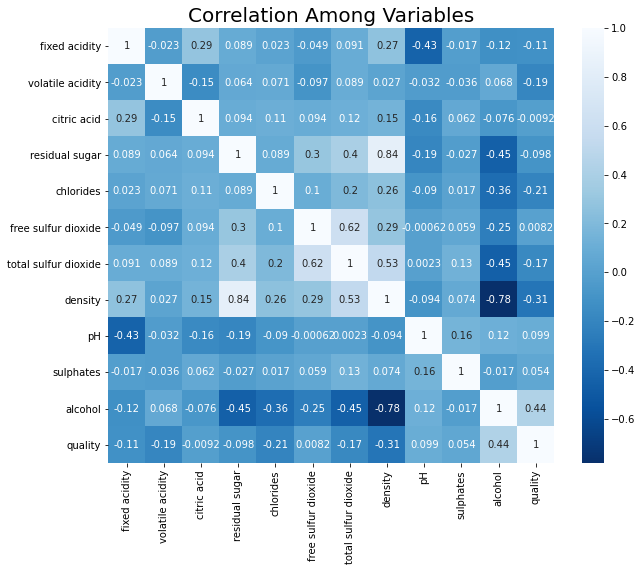

In [300]:
#The heatmap for the correlation among all the varaibles
#We can see that there is no strong correlation between one varaible and quality
plot.subplots(figsize =(10,8))
sns.heatmap(data_file.corr(),annot=True,cmap='Blues_r')
plot.title("Correlation Among Variables", fontsize = 20)

Text(0.5, 1.0, 'Alcohol, ph and quality relation')

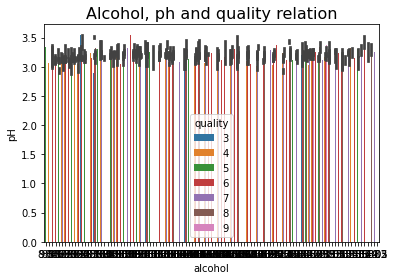

In [13]:
sns.barplot(x="alcohol",y="pH",hue="quality",data =data_file)
plot.title("Alcohol, ph and quality relation",fontsize =16)

In [5]:
data_file['unamed'] = 0

In [6]:
i = 0
while(i<len(data_file)):
    data_file['unamed'][i] = i
    i=i+1
    


C:\Users\AFQ343\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


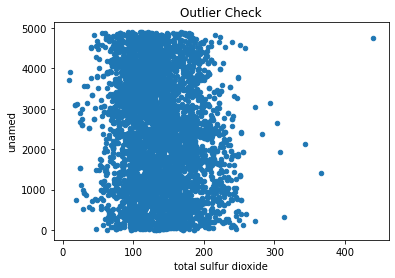

In [7]:
data_file.plot.scatter(x=6,y='unamed',title="Outlier Check")

In [87]:

indexNames = data_file[data_file['total sulfur dioxide'] > 290 ].index
data_file.drop(indexNames , inplace=True)

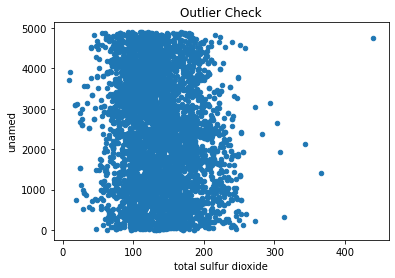

In [11]:
data_file.plot.scatter(x=6,y='unamed',title="Outlier Check")

In [88]:
indexNames = data_file[data_file['residual sugar'] > 30 ].index
data_file.drop(indexNames , inplace=True)


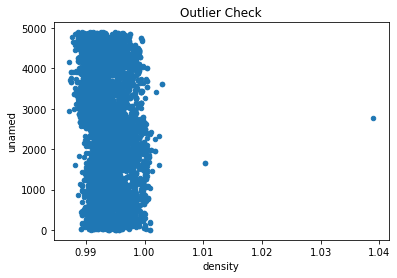

In [8]:
data_file.plot.scatter(x=7,y='unamed',title="Outlier Check")

In [89]:
indexNames = data_file[data_file['density'] > 1.001 ].index
data_file.drop(indexNames , inplace=True)


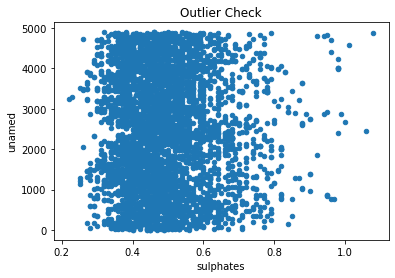

In [9]:
data_file.plot.scatter(x=9,y='unamed',title="Outlier Check")

In [90]:
indexNames = data_file[data_file['sulphates'] > 1.001 ].index
data_file.drop(indexNames , inplace=True)

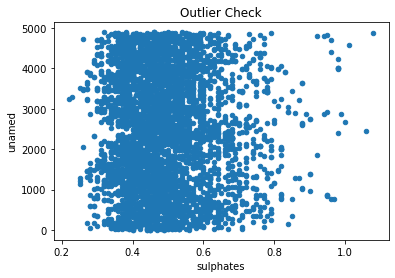

In [10]:
data_file.plot.scatter(x=9,y='unamed',title="Outlier Check")

In [91]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#importing all of our cool shit which we will use

In [92]:
data_file= data_file.drop(['unamed'],axis = 1)

In [93]:
#first we shall split our data into train and test categories
y = data_file['quality']
X = data_file.drop(['quality'],axis = 1)
cols = X.columns 
# note: because the values of the data greatly differ from each other
#(Crtic acid is between 0-1 and total sulfur dioxide is between 9-440 )
#we will need to scale them so that they all will between 0-1 
x_scale = preprocessing.scale(X)
X =pd.DataFrame(x_scale,columns = cols)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22,random_state = 5)


In [97]:
#First up SVM: 
SvModel=SVC(kernel='rbf',C=21,max_iter=-1) 
SvModel.fit(X_train,y_train)
SvModel.score(X_test,y_test)



0.6234855545200373

In [26]:
# 0.62 accuracy, not a bad start. 
ypred = SvModel.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.14      0.38      0.21        13
           5       0.68      0.65      0.66       319
           6       0.77      0.61      0.68       592
           7       0.40      0.60      0.48       137
           8       0.12      0.50      0.20        12
           9       0.00      0.00      0.00         0

    accuracy                           0.62      1073
   macro avg       0.30      0.39      0.32      1073
weighted avg       0.68      0.62      0.64      1073



C:\Users\AFQ343\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
#Next up decision trees... 
# 50/50 chance is not that good. 
decisionTreeModel = DecisionTreeClassifier(max_leaf_nodes=100, random_state=0)
decisionTreeModel.fit(X_train, y_train)
decisionTreeModel.score(X_test,y_test)

0.5302889095992545

In [37]:
#perhaps a random forest will do a tad bit better 

Random_forest = RandomForestClassifier(n_estimators=250)
Random_forest.fit(X_train,y_train)
Random_forest.score(X_test,y_test)


0.6989748369058714

In [35]:
ypred = Random_forest.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.29      0.77      0.42        13
           5       0.73      0.71      0.72       312
           6       0.81      0.66      0.73       579
           7       0.55      0.77      0.64       146
           8       0.39      0.83      0.53        23
           9       0.00      0.00      0.00         0

    accuracy                           0.70      1073
   macro avg       0.39      0.53      0.43      1073
weighted avg       0.73      0.70      0.70      1073



C:\Users\AFQ343\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


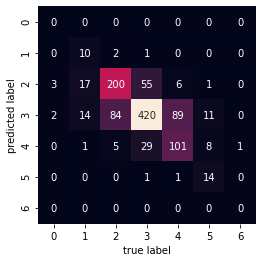

In [191]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plot.xlabel('true label')
plot.ylabel('predicted label');

In [184]:
#By using random forest we get a model that is 0.68 accurate 
# and the two most deciding features are density and alcohol
# not too bad... 
print(X.columns)
print("\n")
print(Random_forest.feature_importances_)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


[0.07353068 0.10112827 0.08199613 0.08428271 0.0838398  0.09510589
 0.09230623 0.10596037 0.08751636 0.07950631 0.11482724]


In [94]:
#let's see if we can improve it further with extremly randomized trees 
from sklearn.ensemble import ExtraTreesClassifier 
exTreeClf= ExtraTreesClassifier(n_estimators=400,max_features="log2")
exTreeClf.fit(X_train,y_train)
exTreeClf.score(X_test,y_test)

0.712022367194781

In [95]:
#A 0.75 accuracy score, pretty good. 
ypred = exTreeClf.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.31      0.65      0.42        17
           5       0.75      0.75      0.75       304
           6       0.83      0.67      0.75       584
           7       0.54      0.76      0.63       144
           8       0.41      0.83      0.55        24
           9       0.00      0.00      0.00         0

    accuracy                           0.71      1073
   macro avg       0.41      0.52      0.44      1073
weighted avg       0.75      0.71      0.72      1073



C:\Users\AFQ343\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


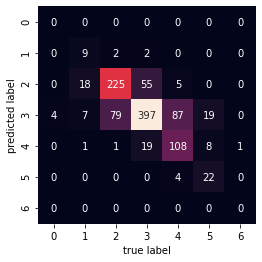

In [63]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plot.xlabel('true label')
plot.ylabel('predicted label');

In [ ]:
print(X.columns)
print("\n")
print(exTreeClf.feature_importances_)